In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### READING THE DATAFRAME PREVIOUS FOR ANALYSING PAST LOAN APPLICATIONS

In [6]:
previousDF= pd.read_csv('previous_application.csv')
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


### CHECKING FOR ROWS AND COLUMNS

In [7]:
previousDF.shape

(1670214, 37)

### CHECKING MISING VALUES IN COLUMNS

In [8]:
previousDF.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [9]:
float(1664263/1670214*100)

99.6436983524267

In [10]:
float(673065/1670214*100)

40.29812946125467

#### DIRECTION: THERE ARE 11 COLUMNS WITH MISSING VALUES GREATER THAN 40% OF THE ROWS. TO MAKE OUR ANALYSIS MORE ACCURATE. IT'S DECIDED TO DROP THESE 11 COLUMNS

### DROPPING COLUMNS WITH MISSING VALUES > 40% 

In [11]:
previousDF.drop('AMT_DOWN_PAYMENT', axis=1, inplace=True)
previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
previousDF.shape

(1670214, 36)

In [13]:
previousDF.drop('RATE_DOWN_PAYMENT', axis=1, inplace=True)
previousDF.drop('RATE_INTEREST_PRIMARY', axis=1, inplace=True)
previousDF.drop('RATE_INTEREST_PRIVILEGED', axis=1, inplace=True)
previousDF.drop('NAME_TYPE_SUITE', axis=1, inplace=True)
previousDF.drop('DAYS_FIRST_DRAWING', axis=1, inplace=True)
previousDF.drop('DAYS_FIRST_DUE', axis=1, inplace=True)
previousDF.drop('DAYS_LAST_DUE_1ST_VERSION', axis=1, inplace=True)
previousDF.drop('DAYS_LAST_DUE', axis=1, inplace=True)
previousDF.drop('DAYS_TERMINATION', axis=1, inplace=True)
previousDF.drop('NFLAG_INSURED_ON_APPROVAL', axis=1, inplace=True)

previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [14]:
previousDF.shape

(1670214, 26)

### CHECKING UPDATED DF FOR MISSING VALUES

In [15]:
previousDF.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMBINATION               346
dtype: int64

### DROPPING PRODUCT_COMBINATION AS PORTFOLIO TYPE, YIELD VALUE AND PRODUCT TYPE ARE ALL IN SEPERATE COLUMNS

In [16]:
previousDF.drop('PRODUCT_COMBINATION', axis=1, inplace=True)

previousDF.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high


#### DIRECTION: PREVIOUS DATAFRAME HAD 37 COLUMNS, WE DROPPED 12 COLUMNS DUE TO REASONS STATED ABOVE. 25 COLUMNS ARE TAKEN FORWARD FOR FURTHER DATA ANALYSIS AND INTERPRETATION

### HANDLING MISSING VALUES

In [17]:
previousDF.AMT_CREDIT.isnull().sum()

1

In [18]:
previousDF.shape

(1670214, 25)

In [19]:
float(1/1670214*100)

5.9872567227912114e-05

### DROP RECORDS WITH AMT_CREDIT MISSING (DELETING ROWS)

In [20]:
previousDF1=previousDF[~previousDF.AMT_CREDIT.isnull()].copy()
previousDF1.shape

(1670213, 25)

### HANDLING MISSING VALUES IN 3 COLUMNS WHERE MISSING VALUES - AMT_ANNUITY, AMT_GOODS_PRICE, CNT_PAYMENT

In [21]:
float(372235/1670213*100)

22.286678405688377

In [22]:
float(385515/1670213*100)

23.08178657452672

In [23]:
previousDF1.AMT_ANNUITY.describe()

count    1.297978e+06
mean     1.595513e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [24]:
previousDF1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670213e+06,1.670213e+06,1.297978e+06,1.670213e+06,1.670213e+06,1.284699e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.297983e+06
mean,1.923089e+06,2.783571e+05,1.595513e+04,1.752340e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806798e+02,3.139513e+02,1.605409e+01
std,5.325981e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932965e-02,7.790999e+02,7.127446e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787140e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


#### DIRECTION: ITS DECIDED TO IMPUTE "0" WHERE AMT ANNUITY IS MISSING AS LACK OF AMT ANUITY IS MOSTLY DUE TO CLIENTS NOT HAVING AMOUNT FROM PREVIOUS LOANS

In [25]:
previousDF1.AMT_ANNUITY.fillna(value=0, inplace= True)
previousDF1.AMT_ANNUITY.describe()

count    1.670213e+06
mean     1.239926e+04
std      1.462541e+04
min      0.000000e+00
25%      2.250000e+03
50%      8.250255e+03
75%      1.682406e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

In [26]:
previousDF1.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                         0
AMT_APPLICATION                     0
AMT_CREDIT                          0
AMT_GOODS_PRICE                385514
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
dtype: int64

#### DIRECTION:ITS DECIDED TO CONTINUE WITH 2 COLUMNS - AMT_GOODS_PRICE AND CNT_PAYMENT WITHOUT IMPUTING FOR MISSING RECORDS IN THEM AS ANY TYPE OF IMPUTATION CAN GIVE INACCURATE RESULTS FOR THESE TWO PARAMETERS

In [27]:
previousDF1.shape

(1670213, 25)

In [28]:
previousDF1.head(50)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high
5,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,18.0,low_normal
6,2315218,175704,Cash loans,0.000,0.0,0.0,NaN,TUESDAY,11,Y,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA
7,1656711,296299,Cash loans,0.000,0.0,0.0,NaN,MONDAY,7,Y,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA
8,2367563,342292,Cash loans,0.000,0.0,0.0,NaN,MONDAY,15,Y,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA
9,2579447,334349,Cash loans,0.000,0.0,0.0,NaN,SATURDAY,15,Y,...,XAP,Repeater,XNA,XNA,XNA,Credit and cash offices,-1,XNA,NaN,XNA


In [29]:
previousDF1.CNT_PAYMENT.head(20)

0     12.0
1     36.0
2     12.0
3     12.0
4     24.0
5     18.0
6      NaN
7      NaN
8      NaN
9      NaN
10    54.0
11    30.0
12    24.0
13     8.0
14     3.0
15     6.0
16     8.0
17     0.0
18    24.0
19    18.0
Name: CNT_PAYMENT, dtype: float64

In [30]:
previousDF1.CNT_PAYMENT.describe()

count    1.297983e+06
mean     1.605409e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

### STANDARDISING AMOUNT RELATED PARAMETERS

In [31]:
previousDF1.AMT_ANNUITY= previousDF1.AMT_ANNUITY.apply(lambda x:round(x,1))
previousDF1.AMT_ANNUITY.head()

0     1730.4
1    25188.6
2    15060.7
3    47041.3
4    31924.4
Name: AMT_ANNUITY, dtype: float64

### ANALYSIS OF VARIABLES

In [32]:
previousDF1.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE                    object
SELLERPLACE_AREA                 int64
NAME_SELLER_INDUSTRY            object
CNT_PAYMENT                    float64
NAME_YIELD_GROUP                object
dtype: object

### UNIVARIATE ANALYSIS - CATEGORICAL FEATURES

In [33]:
previousDF1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193163
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [34]:
previousDF1.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436562
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

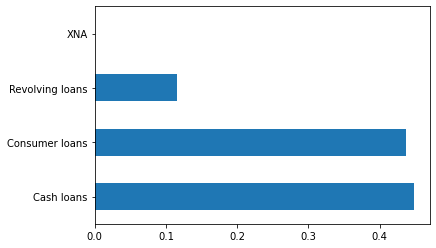

In [35]:
previousDF1.NAME_CONTRACT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### INFERENCE: CASH AND CONSUMER LOANS CONSTITUTE 88% BETWEEN THEM

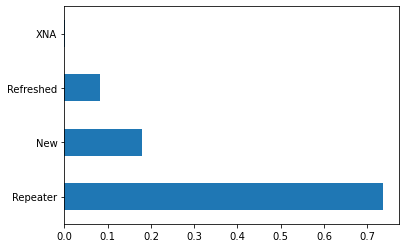

In [36]:
previousDF1.NAME_CLIENT_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

### INFERENCE: ABOUT 75% OF THE LOANS ARE REPEAT TYPE OF LOANS

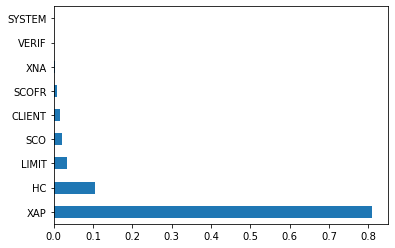

In [37]:
previousDF1.CODE_REJECT_REASON.value_counts(normalize=True).plot.barh()
plt.show()

### INFERENCE: XAP CONSTITUTES 80% OF THE REASONS WHY LOAN APPLICATIONS ARE GETTING REJECTED 

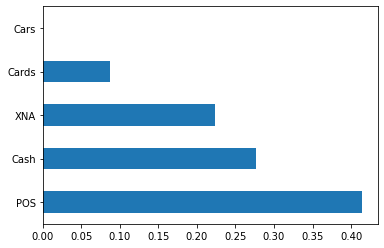

In [38]:
previousDF1.NAME_PORTFOLIO.value_counts(normalize=True).plot.barh()
plt.show()

In [39]:
previousDF1.NAME_YIELD_GROUP.value_counts(normalize=True)

XNA           0.309669
middle        0.230828
high          0.211548
low_normal    0.192847
low_action    0.055107
Name: NAME_YIELD_GROUP, dtype: float64

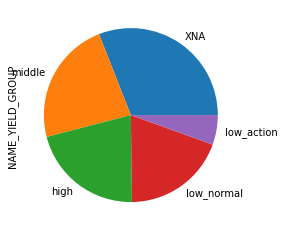

In [40]:
previousDF1.NAME_YIELD_GROUP.value_counts(normalize=True).plot.pie()
plt.show()

#### INFERENCE: GROUP INTEREST RATE ARE EQUALLY DISTRIBUTED ACROSS CATEGORIES. ONLY FOR LOW_ACTION ITS LOWER THAN OTHERS

In [41]:
previousDF1.FLAG_LAST_APPL_PER_CONTRACT.value_counts()

Y    1661738
N       8475
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: int64

In [42]:
previousDF1.FLAG_LAST_APPL_PER_CONTRACT.value_counts(normalize=True)

Y    0.994926
N    0.005074
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: float64

In [43]:
previousDF1.FLAG_LAST_APPL_PER_CONTRACT.head()

0    Y
1    Y
2    Y
3    Y
4    Y
Name: FLAG_LAST_APPL_PER_CONTRACT, dtype: object

#### INFERENCE: 99% OF LOAN APPLICANTS ARE FLAGGED AS LAST APPLICATION AS PER PREVIOUS CONTRACT AND THERE WAS NO DOUBLE APPLIACTION BY ERROR

### UNIVARIATE ANALYSIS - NUMERICAL FEATURES

In [44]:
previousDF1.AMT_ANNUITY.describe()

count    1.670213e+06
mean     1.239926e+04
std      1.462541e+04
min      0.000000e+00
25%      2.250000e+03
50%      8.250300e+03
75%      1.682410e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

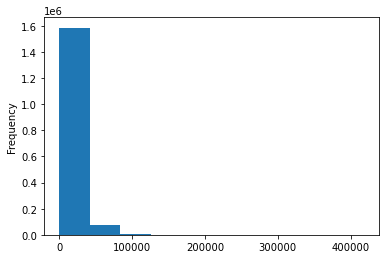

In [45]:
previousDF1.AMT_ANNUITY.plot.hist()
plt.show()

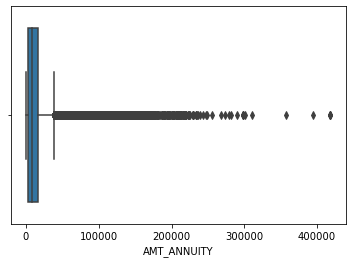

In [46]:
sns.boxplot(previousDF1.AMT_ANNUITY)
plt.show()

#### INFERENCE: THERE ARE HIGH VALUES WHICH ARE CONTINIOUS IN NATURE. WITH FEW MUCH HIGHER VALUES. BUT THESE CAN BE GENUINE. 

In [47]:
previousDF1.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

0.50     8250.3
0.70    14359.9
0.90    30219.9
0.95    41963.9
0.99    65758.5
Name: AMT_ANNUITY, dtype: float64

In [48]:
previousDF1[previousDF1.AMT_ANNUITY>40000].describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,9.305500e+04,93055.000000,93055.000000,9.305500e+04,9.305500e+04,9.175000e+04,93055.000000,93055.000000,93055.000000,93055.000000,93055.000000
mean,1.926645e+06,278752.992918,55628.346433,9.771001e+05,1.062604e+06,9.910770e+05,12.444823,0.998453,-590.497501,112.214497,29.337263
std,5.324940e+05,102704.814026,18006.569367,5.200847e+05,5.488952e+05,5.103876e+05,3.368733,0.039308,364.219625,2046.399784,18.597920
min,1.000010e+06,100003.000000,40000.300000,0.000000e+00,4.500000e+04,0.000000e+00,0.000000,0.000000,-2899.000000,-1.000000,0.000000
25%,1.461902e+06,189702.000000,45000.000000,5.895000e+05,6.750000e+05,6.300000e+05,10.000000,1.000000,-785.000000,-1.000000,12.000000
50%,1.930217e+06,279283.000000,50026.000000,9.000000e+05,9.784080e+05,9.000000e+05,12.000000,1.000000,-546.000000,-1.000000,24.000000
75%,2.389586e+06,368034.000000,59991.300000,1.269000e+06,1.350000e+06,1.296000e+06,15.000000,1.000000,-333.000000,-1.000000,48.000000
max,2.845259e+06,456255.000000,418058.100000,5.850000e+06,4.509688e+06,5.850000e+06,23.000000,1.000000,-2.000000,74625.000000,84.000000


### INFERENCE: WHEN WE ARE WORKING WITH AMT_ANNUITY, WE WILL NOT BE WORKING WITH MEAN BUT QUANTILE OR PERCENTILE (DUE TO UNUSUALY HIGH CONTINUOUS VALUES)

In [49]:
previousDF1.AMT_APPLICATION.describe()

count    1.670213e+06
mean     1.752340e+05
std      2.927798e+05
min      0.000000e+00
25%      1.872000e+04
50%      7.104600e+04
75%      1.803600e+05
max      6.905160e+06
Name: AMT_APPLICATION, dtype: float64

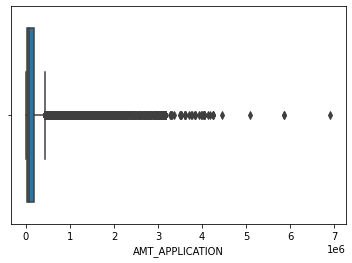

In [50]:
sns.boxplot(previousDF1.AMT_APPLICATION)
plt.show()

### INFERENCE: WHEN WE ARE WORKING WITH AMT_APPLICATION, WE WILL NOT BE WORKING WITH MEAN BUT QUANTILE OR PERCENTILE

In [51]:
previousDF1.AMT_CREDIT.describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

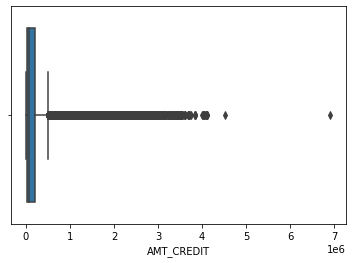

In [52]:
sns.boxplot(previousDF1.AMT_CREDIT)
plt.show()

### INFERENCE: WHEN WE ARE WORKING WITH AMT_CREDIT, WE WILL NOT BE WORKING WITH MEAN BUT QUANTILE OR PERCENTILE

In [53]:
previousDF1.AMT_GOODS_PRICE.describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

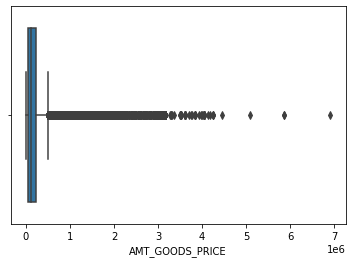

In [54]:
sns.boxplot(previousDF1.AMT_GOODS_PRICE)
plt.show()

### INFERENCE: WHEN WE ARE WORKING WITH AMT_GOODS_PRICE, WE WILL NOT BE WORKING WITH MEAN BUT QUANTILE OR PERCENTILE

### BIVARIATE ANALYSIS - NUMERIC - NUMERIC

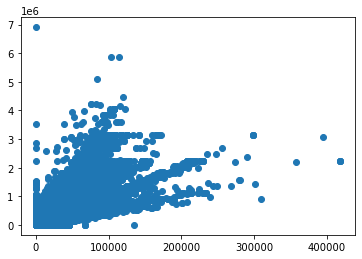

In [55]:
plt.scatter(previousDF1.AMT_ANNUITY,previousDF1.AMT_APPLICATION)
plt.show()

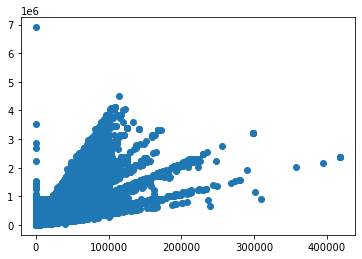

In [56]:
plt.scatter(previousDF1.AMT_ANNUITY,previousDF1.AMT_CREDIT)
plt.show()

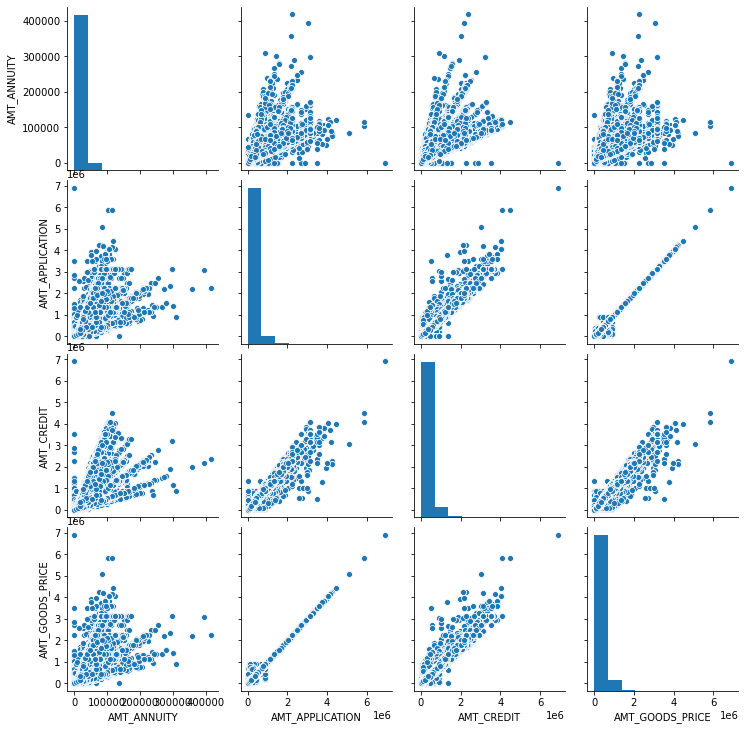

In [57]:
sns.pairplot(data=previousDF1, vars=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"])
plt.show()

#### INFERENCE: THERE IS REASONABLY GOOD CORRELATION BETWEEN AMOUNT VARIABLES (NUMERIC) PARAMETERS

### QUANTIFY USING CORRELATION VALUE

In [58]:
previousDF1[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.824023,0.832813,0.818951
AMT_APPLICATION,0.824023,1.000000,0.975824,0.999884
AMT_CREDIT,0.832813,0.975824,1.000000,0.993087
AMT_GOODS_PRICE,0.818951,0.999884,0.993087,1.000000


### CORRELATION HEATMAP

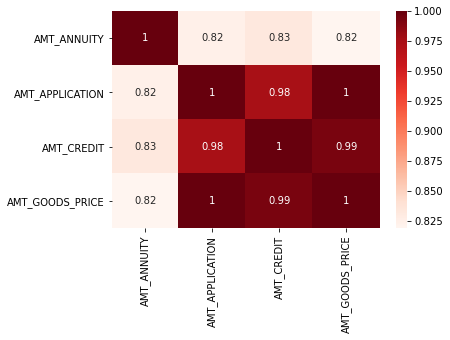

In [59]:
sns.heatmap(previousDF1[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr(),annot=True, cmap="Reds")
plt.show()

#### INFERENCE: ITS PROVED AGAIN BY CORRELATION MATRIX THAT THERE IS HIGH CORRELATION BETWEEN AMT OR NUMERIC PARAMETERS WITH CORRELATION FACTOR BETWEEN 0.82 TO 1

### BIVARIATE ANALYSIS: CATEGORICAL- NUMERICAL

In [60]:
previousDF1.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].mean()

NAME_CONTRACT_TYPE
Cash loans         304061.487936
Consumer loans      91524.593300
Revolving loans    173505.596310
XNA                     0.000000
Name: AMT_CREDIT, dtype: float64

In [61]:
previousDF1.groupby("NAME_CONTRACT_TYPE")["AMT_CREDIT"].median()

NAME_CONTRACT_TYPE
Cash loans         142843.5
Consumer loans      66316.5
Revolving loans     90000.0
XNA                     0.0
Name: AMT_CREDIT, dtype: float64

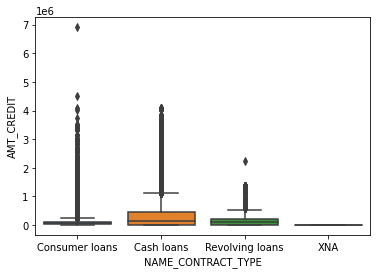

In [62]:
sns.boxplot(data=previousDF1, x="NAME_CONTRACT_TYPE", y="AMT_CREDIT")
plt.show()

#### INFERENCE: BOX PLOT IS NOT GIVING GREAT INSIGHT. HOWEVER AMOUNT CREDIT IS SPREAD OUT FOR CASH LOANS THAN CONSUMER AND REVOLVING LOANS.

#### INFERENCE: INSTEAD OF REMOVING OUTLIERS WHICH COULD BE IMPORTANT TO BE RETAINED, WE WILL LOOK AT MEANS AND QUANTILES IN OUR ANALYSIS

## CREATING TWO DATAFRAMES WHERE LOANS ARE APPROVED OR REJECTED FOR FURTHER ANALYSIS TO FEED INTO APPLICATION DATAFRAME

In [63]:
previousDF1.shape

(1670213, 25)

In [64]:
previousDF1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP
0,2030495,271877,Consumer loans,1730.4,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle
1,2802425,108129,Cash loans,25188.6,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action
2,2523466,122040,Cash loans,15060.7,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high
3,2819243,176158,Cash loans,47041.3,450000.0,470790.0,450000.0,MONDAY,7,Y,...,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle
4,1784265,202054,Cash loans,31924.4,337500.0,404055.0,337500.0,THURSDAY,9,Y,...,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high


In [65]:
previousDF1.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.284699e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.670213e+06,1.297983e+06
mean,1.923089e+06,2.783571e+05,1.239926e+04,1.752340e+05,1.961140e+05,2.278473e+05,1.248418e+01,9.964675e-01,-8.806798e+02,3.139513e+02,1.605409e+01
std,5.325981e+05,1.028148e+05,1.462541e+04,2.927798e+05,3.185746e+05,3.153966e+05,3.334028e+00,5.932965e-02,7.790999e+02,7.127446e+03,1.456729e+01
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.922000e+03,-1.000000e+00,0.000000e+00
25%,1.461857e+06,1.893290e+05,2.250000e+03,1.872000e+04,2.416050e+04,5.084100e+04,1.000000e+01,1.000000e+00,-1.300000e+03,-1.000000e+00,6.000000e+00
50%,1.923110e+06,2.787140e+05,8.250300e+03,7.104600e+04,8.054100e+04,1.123200e+05,1.200000e+01,1.000000e+00,-5.810000e+02,3.000000e+00,1.200000e+01
75%,2.384280e+06,3.675140e+05,1.682410e+04,1.803600e+05,2.164185e+05,2.340000e+05,1.500000e+01,1.000000e+00,-2.800000e+02,8.200000e+01,2.400000e+01
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,6.905160e+06,2.300000e+01,1.000000e+00,-1.000000e+00,4.000000e+06,8.400000e+01


In [66]:
previousDF1.NAME_CONTRACT_STATUS.head(20)

0     Approved
1     Approved
2     Approved
3     Approved
4      Refused
5     Approved
6     Canceled
7     Canceled
8     Canceled
9     Canceled
10    Approved
11    Approved
12    Approved
13    Approved
14    Approved
15    Approved
16    Approved
17    Approved
18    Approved
19     Refused
Name: NAME_CONTRACT_STATUS, dtype: object

In [67]:
previousDF1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036780
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [68]:
previousDF1.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

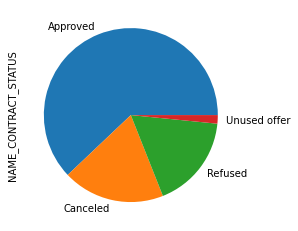

In [69]:
previousDF1.NAME_CONTRACT_STATUS.value_counts(normalize=True).plot.pie()
plt.show()

#### INFERENCE: APPROVED LOAN IS 62%, REFUSED LOAN IS 18.9% FOLLOWED BY CANCELED LOAN IS 17.4%. UNUSED OFFER IS AROUND 1%

### CREATING NEW DATAFRAME DF2 FOR "APPROVED" STATUS CATEGORY OF LOAN APPLICATION. 

In [70]:
previousDF2=previousDF1[previousDF1.NAME_CONTRACT_STATUS == "Approved"].copy()
previousDF2.shape

(1036780, 25)

In [71]:
previousDF2.NAME_CONTRACT_STATUS.head(25)

0     Approved
1     Approved
2     Approved
3     Approved
5     Approved
10    Approved
11    Approved
12    Approved
13    Approved
14    Approved
15    Approved
16    Approved
17    Approved
18    Approved
21    Approved
25    Approved
26    Approved
27    Approved
28    Approved
30    Approved
31    Approved
34    Approved
35    Approved
37    Approved
38    Approved
Name: NAME_CONTRACT_STATUS, dtype: object

### ANALYSING NUMERIC-NUMERIC BIVARIATE FOR "APPROVED" STATUS CATEGORY

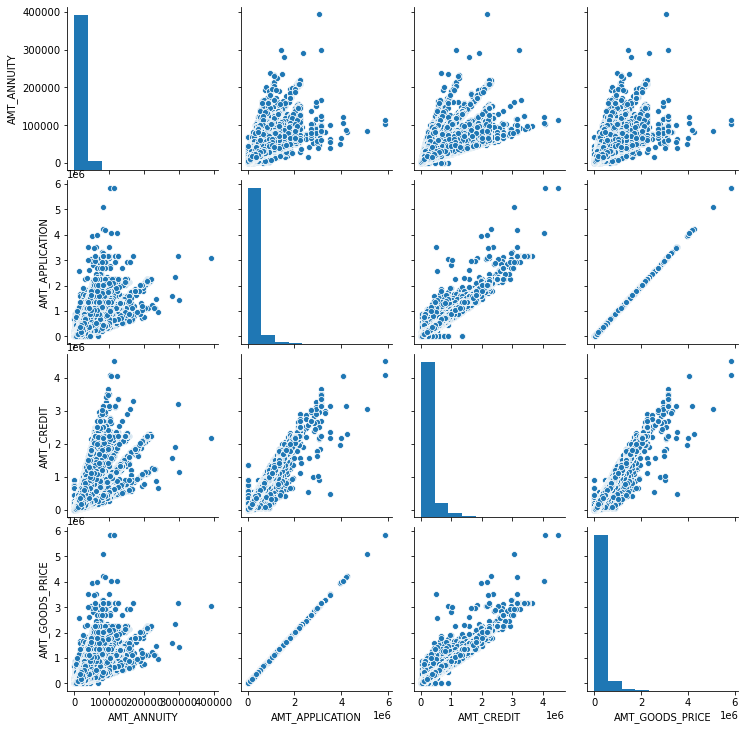

In [72]:
sns.pairplot(data=previousDF2, vars=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"])
plt.show()

#### THERE IS HIGH CORRELATION AMONG ALL THE AMOUNT RELATED PARAMETERS IN APPROVED LOAN CATEGORY 

In [73]:
previousDF2[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr()

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
AMT_ANNUITY,1.000000,0.814336,0.825999,0.830852
AMT_APPLICATION,0.814336,1.000000,0.961757,1.000000
AMT_CREDIT,0.825999,0.961757,1.000000,0.993244
AMT_GOODS_PRICE,0.830852,1.000000,0.993244,1.000000


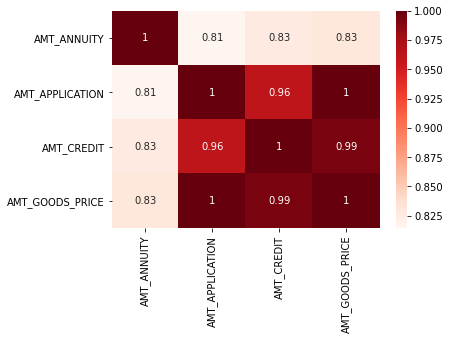

In [74]:
sns.heatmap(previousDF2[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr(),annot=True, cmap="Reds")
plt.show()

#### INFERENCE: CORRELATION IS HIGH AMONG AMOUNT CATEGORY OR NUMERIC VARIABLE FOR APPROVED CATEGORY WITH CORRELATION COEFFICIENT BETWEEN 0.81 TO 1

### CREATING NEW DATAFRAME DF3 FOR "REFUSED" STATUS CATEGORY OF LOAN APPLICATION

In [75]:
previousDF3=previousDF1[previousDF1.NAME_CONTRACT_STATUS == "Refused"].copy()
previousDF3.shape

(290678, 25)

In [76]:
previousDF3.NAME_CONTRACT_STATUS.head(25)

4      Refused
19     Refused
20     Refused
22     Refused
23     Refused
29     Refused
36     Refused
45     Refused
52     Refused
54     Refused
80     Refused
81     Refused
84     Refused
85     Refused
100    Refused
101    Refused
103    Refused
105    Refused
109    Refused
110    Refused
114    Refused
116    Refused
117    Refused
118    Refused
125    Refused
Name: NAME_CONTRACT_STATUS, dtype: object

### ANALYSING NUMERIC-NUMERIC BIVARIATE FOR "REFUSED" STATUS CATEGORY

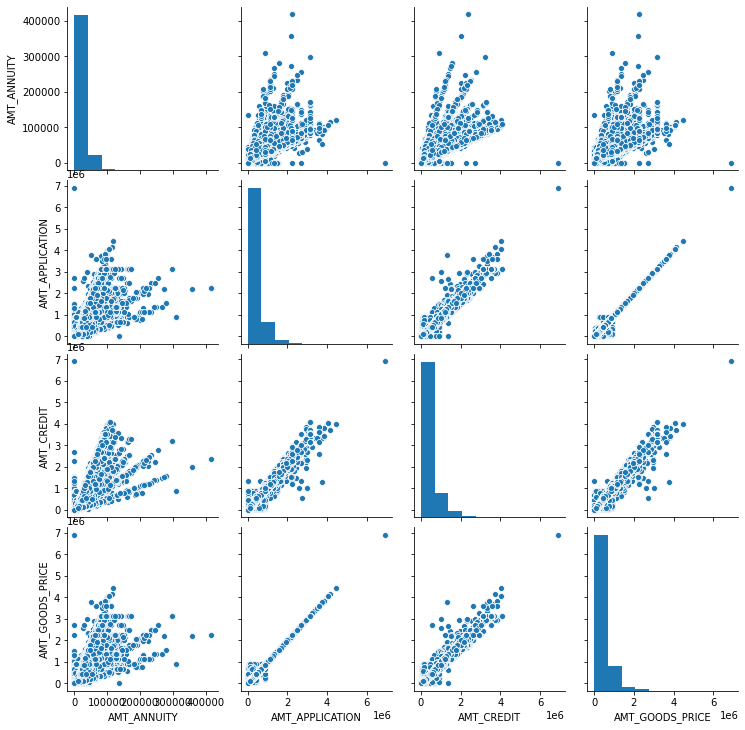

In [77]:
sns.pairplot(data=previousDF3, vars=["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"])
plt.show()

#### INFERENCE: THERE IS HIGH CORRELATION AMONG AMOUNT CATEGORY IN REFUSED LOAN CATEGORY AS WELL

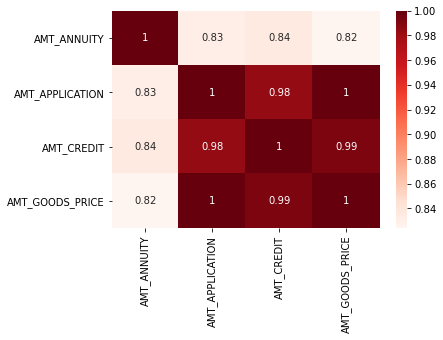

In [78]:
sns.heatmap(previousDF3[["AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]].corr(),annot=True, cmap="Reds")
plt.show()

#### INFERENCE: ITS PROVED AGAIN THAT THE CORRELATION IS HIGH EVEN FOR REFUSED CATEGORY RANGING FROM 0.82 TO 1

### ANALYSIS OF REASONS BEHIND REJECTION OF LOAN APPLICATION

In [79]:
previousDF3.CODE_REJECT_REASON.value_counts()

HC        175231
LIMIT      55680
SCO        37467
SCOFR      12811
XNA         5236
VERIF       3535
SYSTEM       717
XAP            1
Name: CODE_REJECT_REASON, dtype: int64

In [80]:
previousDF3.CODE_REJECT_REASON.value_counts(normalize=True)

HC        0.602835
LIMIT     0.191552
SCO       0.128895
SCOFR     0.044073
XNA       0.018013
VERIF     0.012161
SYSTEM    0.002467
XAP       0.000003
Name: CODE_REJECT_REASON, dtype: float64

#### INFERENCE: 60% OF LOANS ARE GETTIGN REJECTED DUE TO HC REASON WHICH IS THE HIGHEST 

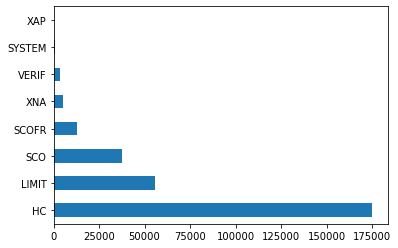

In [81]:
previousDF3.CODE_REJECT_REASON.value_counts().plot.barh()
plt.show()

#### INFERENCE: 90% OF LOANS ARE GETTING REJECTED BETWEEN THE THREE REASONS OF - HC, LIMIT AND SCO

### BIVARIATE ANALYSIS FOR "APPROVED LOAN" CATEGORIES

In [82]:
previousDF1.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].mean()

NAME_CONTRACT_STATUS
Approved        14720.250898
Canceled         1006.789275
Refused         17614.097114
Unused offer      350.013970
Name: AMT_ANNUITY, dtype: float64

#### INFERENCE: PEOPLE WITH LOW ANNUITY FROM PREIVIOUS LOAN ARE MOST LIKELY TO GET LOAN CANCELLED
#### INFERENCE: PEOPLE WITH LOW ANNUITY FROM PREVIOUS LOAN ARE MOST LIKELY TO HAVE THEIR OFFER "UNUSED"

In [83]:
previousDF1.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].median()

NAME_CONTRACT_STATUS
Approved        10380.1
Canceled            0.0
Refused         12750.0
Unused offer        0.0
Name: AMT_ANNUITY, dtype: float64

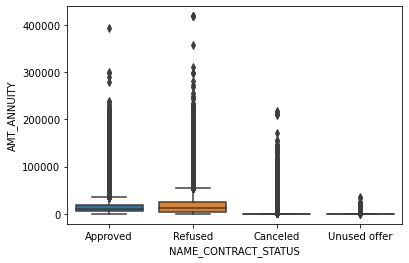

In [84]:
sns.boxplot(data=previousDF1, x="NAME_CONTRACT_STATUS", y="AMT_ANNUITY")
plt.show()

#### INFERENCE: CANCELLED AND UNUSED OFFERS HAVE TYPICALLY VERY LOW AMT_ANNUITY

#### DIRECTION: SINCE BOX PLOT IS NOT VERY HELPFUL DUE TO CONTINUOUS HIGH VALUES, ANALYSIS WILL BE DONE USING MEDIAN AND QUANTILES (75%)

### ANALYSING FOR 75TH PERCENTILE AS OUTLIERS ARE CONTINIOUS BUT VERY HIGH VALUES

In [85]:
def p75(x):
    return np.quantile(x,0.75)

In [86]:
previousDF1.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].aggregate(["mean", "median",p75])

,mean,median,p75
NAME_CONTRACT_STATUS,,,
Approved,14720.250898,10380.1,18337.725
Canceled,1006.789275,0.0,0.000
Refused,17614.097114,12750.0,25362.800
Unused offer,350.013970,0.0,0.000


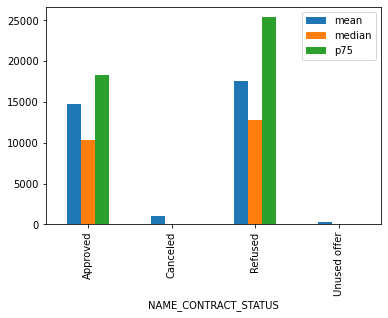

In [87]:
previousDF1.groupby("NAME_CONTRACT_STATUS")["AMT_ANNUITY"].aggregate(["mean", "median",p75]).plot.bar()
plt.show()

#### INFERENCE: AMT_ANNUITY IS TYPICALLY HIGHER IN CASE OF LOANS WHICH GETTING REFUSED THAN THAT OF LOANS WHICH ARE GETTING ACCEPTED

## ANALYSING THE NUMERIC AND CATEGORICAL VARIABLES WITH TARGET VARIABLE APPROVAL STATUS (APPROVED, REFUSED, CANCELLED, UNUSED OFFER) BY CREATING A FUNCTION "APPROVAL RATE"

In [88]:
previousDF1["NAME_CONTRACT_STATUS_flag"]= np.where(previousDF1.NAME_CONTRACT_STATUS== "Approved",1,0)

In [89]:
previousDF1.NAME_CONTRACT_STATUS_flag.value_counts()

1    1036780
0     633433
Name: NAME_CONTRACT_STATUS_flag, dtype: int64

In [90]:
previousDF1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036780
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [91]:
previousDF1.NAME_CONTRACT_STATUS.value_counts(normalize=True)

Approved        0.620747
Canceled        0.189388
Refused         0.174036
Unused offer    0.015828
Name: NAME_CONTRACT_STATUS, dtype: float64

In [92]:
previousDF1.NAME_CONTRACT_STATUS_flag.mean()

0.6207471741628163

### ANALYZING CATEGORICAL TO CATEGORICAL - APPROVAL STATUS V/S CONTRACT TYPES

In [93]:
previousDF1.groupby(["NAME_CONTRACT_TYPE"])["NAME_CONTRACT_STATUS_flag"].mean()

NAME_CONTRACT_TYPE
Cash loans         0.418084
Consumer loans     0.859177
Revolving loans    0.506153
XNA                0.000000
Name: NAME_CONTRACT_STATUS_flag, dtype: float64

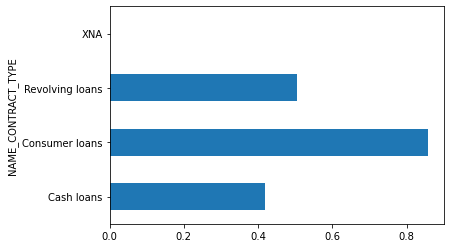

In [94]:
previousDF1.groupby(["NAME_CONTRACT_TYPE"])["NAME_CONTRACT_STATUS_flag"].mean().plot.barh()

#### INFERENCE: THE APPROVAL RATE OF CONSUMER LOANS IS HIGHEST FOLLOWED BY REVOLVING LOAN AND THEN BY CASH LOANS

### ANALYZING CATEGORICAL TO CATEGORICAL - APPROVAL STATUS V/S CLIENT TYPES

In [95]:
previousDF1.groupby(["NAME_CLIENT_TYPE"])["NAME_CONTRACT_STATUS_flag"].mean()

NAME_CLIENT_TYPE
New          0.933290
Refreshed    0.715818
Repeater     0.534284
XNA          0.297785
Name: NAME_CONTRACT_STATUS_flag, dtype: float64

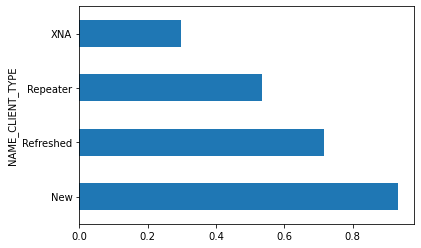

In [96]:
previousDF1.groupby(["NAME_CLIENT_TYPE"])["NAME_CONTRACT_STATUS_flag"].mean().plot.barh()

#### INFERNECE: NEW CLIENTS' LOAN APPLICATION ARE LIKELY TO BE APPROVED HIGHEST FOLLOWED BY REFRESHED AND THEN REPEATER

### ANALYZING CATEGORICAL TO CATEGORICAL - APPROVAL STATUS V/S CASH LOAN PURPOSE. THIS IS WITHIN THE CASH LOAN CONTRACT TYPE

In [97]:
previousDF1.NAME_CASH_LOAN_PURPOSE.head(10)

0                  XAP
1                  XNA
2                  XNA
3                  XNA
4              Repairs
5    Everyday expenses
6                  XNA
7                  XNA
8                  XNA
9                  XNA
Name: NAME_CASH_LOAN_PURPOSE, dtype: object

In [98]:
previousDF1.groupby(["NAME_CASH_LOAN_PURPOSE"])["NAME_CONTRACT_STATUS_flag"].mean()

NAME_CASH_LOAN_PURPOSE
Building a house or an annex        0.250650
Business development                0.305164
Buying a garage                     0.286765
Buying a holiday home / land        0.247655
Buying a home                       0.231214
Buying a new car                    0.218379
Buying a used car                   0.305055
Car repairs                         0.449184
Education                           0.486332
Everyday expenses                   0.511589
Furniture                           0.444593
Gasification / water supply         0.383333
Hobby                               0.345455
Journey                             0.451170
Medicine                            0.477001
Money for a third person            0.480000
Other                               0.427793
Payments on other loans             0.157431
Purchase of electronic equipment    0.554194
Refusal to name the goal            0.266667
Repairs                             0.365117
Urgent needs                    

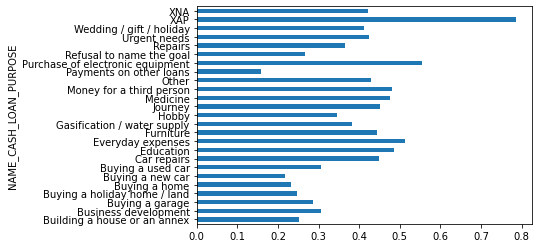

In [99]:
previousDF1.groupby(["NAME_CASH_LOAN_PURPOSE"])["NAME_CONTRACT_STATUS_flag"].mean().plot.barh()

#### INFERENCE: XAP LOANS HAS GOT THE HIGHER APPROVAL RATE FOLLOWED BY PURCHASE OF ELECTRONIC EQUIPMENTS. REST ARE AROUND SAME APPROVAL RATE

### ANALYZING CATEGORICAL TO NUMERIC - APPROVAL STATUS V/S CNT PAYMENT OR TERM OF LOAN

### BINNING CONTRACT TENURE OR TERM OR CNT_PAYMENT

In [100]:
previousDF1.CNT_PAYMENT.head()

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
Name: CNT_PAYMENT, dtype: float64

In [101]:
previousDF1.CNT_PAYMENT.value_counts()

12.0    323049
6.0     190461
0.0     144984
10.0    141851
24.0    137764
18.0     77430
36.0     72583
60.0     53600
48.0     47316
8.0      30349
4.0      26924
30.0     16924
14.0      8253
42.0      7136
16.0      5710
5.0       3957
54.0      2104
20.0      1805
7.0       1434
9.0       1236
3.0       1100
15.0       904
11.0       669
72.0       139
13.0        51
17.0        48
84.0        45
22.0        37
23.0        27
26.0        13
35.0        11
66.0        10
29.0         8
28.0         8
32.0         6
19.0         6
34.0         4
59.0         4
45.0         3
41.0         3
47.0         3
21.0         3
44.0         2
39.0         2
38.0         2
46.0         2
40.0         1
33.0         1
53.0         1
Name: CNT_PAYMENT, dtype: int64

In [102]:
pd.cut(previousDF1.CNT_PAYMENT[:6],[0,12,24,36,48,60,100], labels=["<1-year", "1-2 years","2-3 years","3-4 years","4-5 years","5+ years"])

0      <1-year
1    2-3 years
2      <1-year
3      <1-year
4    1-2 years
5    1-2 years
Name: CNT_PAYMENT, dtype: category
Categories (6, object): [<1-year < 1-2 years < 2-3 years < 3-4 years < 4-5 years < 5+ years]

In [104]:
previousDF1.CNT_PAYMENT.head(6)

0    12.0
1    36.0
2    12.0
3    12.0
4    24.0
5    18.0
Name: CNT_PAYMENT, dtype: float64

In [105]:
previousDF1["CNT_PAYMENT_GROUP"]= pd.cut(previousDF1.CNT_PAYMENT,[0,12,24,36,48,60,100], labels=["<1-year", "1-2 years","2-3 years","3-4 years","4-5 years","5+ years"])

In [106]:
previousDF1.CNT_PAYMENT_GROUP.value_counts(normalize=True)

<1-year      0.625352
1-2 years    0.201247
2-3 years    0.077674
4-5 years    0.048317
3-4 years    0.047242
5+ years     0.000168
Name: CNT_PAYMENT_GROUP, dtype: float64

### DIRECTION: TERM OF CONTRACT OR CNT_PAYMENT HAS BEEN BINNED INTO 6 BUCKETS AS SHOWN ABOVE

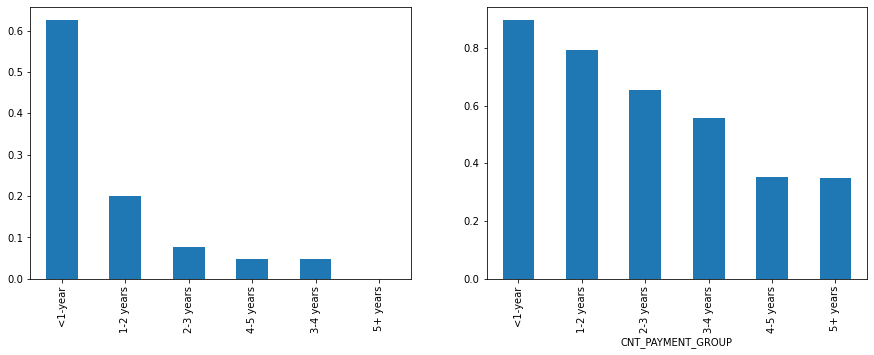

In [107]:
plt.figure(figsize=[15,5])
plt.subplot(1,2,1)
previousDF1.CNT_PAYMENT_GROUP.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
previousDF1.groupby(["CNT_PAYMENT_GROUP"])["NAME_CONTRACT_STATUS_flag"].mean().plot.bar()
plt.show()

#### INFERENCE: AS THE TERM OF LOAN INCREASES THE APPROVAL RATE DECRESES
#### FOR LOAN WITH TERM UPTO 1 YEAR, THE APPROVAL RATE IS > 80% WHICH IS HIGHEST AMONG ALL THE CNT_PAYMENT (TERM) CATEGORIES

### DIRECTION: CHECKING THE SHAPE OF DATAFRAME AGAIN

In [109]:
previousDF3.shape

(290678, 25)

In [110]:
previousDF2.shape

(1036780, 25)

## MULTIVARIATE ANALYSIS - COMBINATION OF VARIABLES

#### CHECKING APPROVAL RATE FOR NAME_CLIENT_TYPE AND CNT_PAYMENT (TERM)

In [122]:
result=pd.pivot_table(data=previousDF1, index="NAME_CLIENT_TYPE", columns="CNT_PAYMENT_GROUP", values="NAME_CONTRACT_STATUS_flag")
result

CNT_PAYMENT_GROUP,<1-year,1-2 years,2-3 years,3-4 years,4-5 years,5+ years
NAME_CLIENT_TYPE,,,,,,
New,0.968802,0.941551,0.895620,0.844225,0.715655,0.851852
Refreshed,0.946713,0.886658,0.775664,0.693085,0.504631,0.125000
Repeater,0.848838,0.745390,0.624848,0.538320,0.334136,0.276730
XNA,0.889640,0.595588,0.392857,0.322034,0.294118,NaN


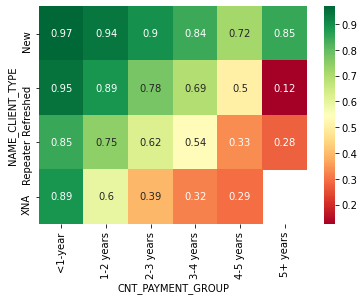

In [125]:
sns.heatmap(result, annot=True, cmap="RdYlGn")

#### INFERENCE: THE APPROVAL RATE FOR ANY CLIENT TYPE OF LOAN DECREASES WITH HIGHER TERM (CNT_PAYMENT) OF LOANS. IN OTHER WORDS THE SHORTER THE TERM OF LOAN, HIGHER IS THE APPROVAL RATE

#### CHECKING APPROVAL RATE FOR NAME_CONTRACT_TYPE AND CNT_PAYMENT (TERM)

In [126]:
result1=pd.pivot_table(data=previousDF1, index="NAME_CONTRACT_TYPE", columns="CNT_PAYMENT_GROUP", values="NAME_CONTRACT_STATUS_flag")
result1

CNT_PAYMENT_GROUP,<1-year,1-2 years,2-3 years,3-4 years,4-5 years,5+ years
NAME_CONTRACT_TYPE,,,,,,
Cash loans,0.810543,0.744769,0.648521,0.556180,0.350415,0.214876
Consumer loans,0.916486,0.859297,0.705575,0.538462,0.635417,0.575342


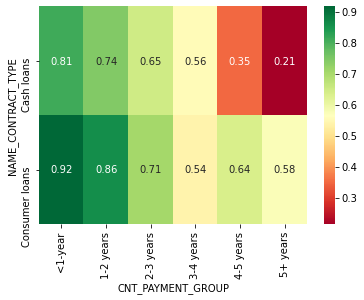

In [127]:
sns.heatmap(result1, annot=True, cmap="RdYlGn")

#### INFERENCE: APPROVAL RATE DECREASES FOR ANY CONTRACT_TYPE AS THE TERM (CNT_PAYMENT) INCREASES. ALSO AS THE TERM INCREASES CASH LOANS HAVE LESS APPROVAL RATE THAN CONSUMER LOANS

#### CHECKING OF THERE IS CNT_PAYMENT FOR REVOLVING LOANS OR NOT

In [141]:
previousDF1.loc[2:50, ["NAME_CONTRACT_TYPE","CNT_PAYMENT"]]

,NAME_CONTRACT_TYPE,CNT_PAYMENT
2,Cash loans,12.0
3,Cash loans,12.0
4,Cash loans,24.0
5,Cash loans,18.0
6,Cash loans,NaN
7,Cash loans,NaN
8,Cash loans,NaN
9,Cash loans,NaN
10,Cash loans,54.0
11,Cash loans,30.0


#### THERE IS NO CNT_PAYMENT FOR REVOLVING LOANS, MEANING TERM IS INSIGNIFICANT. SO ABOVE CHART DESCRIBING ONLY CONSUMER AND CASH TYPE OF LOANS AGAINST TERM IS CORRECT

## MULTIVARIATE ANALYSIS
### CHECKING APPROVAL RATE OF NAME_CONTRACT_TYPE WITH NAME_CLIENT TYPE

In [142]:
result2=pd.pivot_table(data=previousDF1, index="NAME_CLIENT_TYPE", columns="NAME_CONTRACT_TYPE", values="NAME_CONTRACT_STATUS_flag")
result2

NAME_CONTRACT_TYPE,Cash loans,Consumer loans,Revolving loans,XNA
NAME_CLIENT_TYPE,,,,
New,0.769512,0.956592,0.679925,0.0
Refreshed,0.563252,0.874874,0.578529,0.0
Repeater,0.395611,0.790073,0.488570,0.0
XNA,0.104269,0.828402,0.143519,NaN


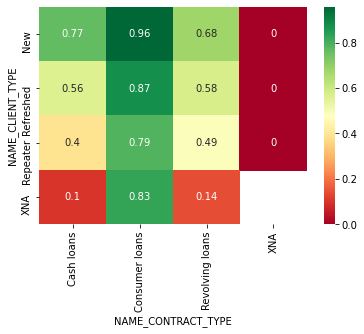

In [143]:
sns.heatmap(result2, annot=True, cmap="RdYlGn")

#### INFERENCE: APPLICANTS WHO ARE APPLYING FOR LOAN FOR FIRST TIME (NEW) IN CONSUMER LOAN (CONTRACT_TYPE) HAS THE HIGHEST APPROVAL RATE

#### INFERENCE: SIMILALRY REVOLVING LOANS TYPE IN XNA CATEGORY HAS THE LOWEST APPROVAL RATE 

### ### CHECKING APPROVAL RATE OF CASH_LOAN_PURPOSE WITH NAME_CLIENT TYPE

In [145]:
result3=pd.pivot_table(data=previousDF1, index="NAME_CASH_LOAN_PURPOSE", columns="NAME_CLIENT_TYPE", values="NAME_CONTRACT_STATUS_flag")
result3

NAME_CLIENT_TYPE,New,Refreshed,Repeater,XNA
NAME_CASH_LOAN_PURPOSE,,,,
Building a house or an annex,0.814815,0.427586,0.172899,0.000000
Business development,0.901639,0.296296,0.198813,0.000000
Buying a garage,0.916667,0.500000,0.216667,NaN
Buying a holiday home / land,0.844828,0.296296,0.167411,NaN
Buying a home,0.776316,0.483871,0.151934,0.333333
Buying a new car,0.775000,0.306667,0.159251,0.000000
Buying a used car,0.786408,0.369792,0.237516,0.250000
Car repairs,0.898551,0.764706,0.332800,NaN
Education,0.922179,0.590909,0.391827,0.000000


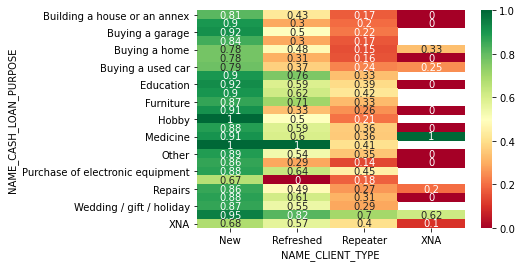

In [151]:
sns.heatmap(result3, annot=True, cmap="RdYlGn")

#### INFERENCE: WITHIN CASH TYPE OF LOANS, NEW HAS HIGHEST APPROVAL RATE AND IT DECREASES PROGRESSIVELY FOR REFRESHED, REPEATER TYPE OF LOANS AND SO ON

#### INFERENCE: THERE ARE CERTAIN CATEGORIES LIKE HOBBY, MEDICINE AND MONEY FOR THIRD PERSON HAS 100% APPROVAL RATE IN DIFFERNT CLIENT TYPES

### UNIVARIATE ANALYSIS OF NAME_PORTFOLIO

In [154]:
previousDF1.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144984
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [155]:
previousDF1.NAME_PORTFOLIO.value_counts(normalize=True)

POS      0.413726
Cash     0.276350
XNA      0.222864
Cards    0.086806
Cars     0.000254
Name: NAME_PORTFOLIO, dtype: float64

### INFERENCE: POS HAS HIGHEST WITH 40% FOLLOWED BY 40% COMBINED BETWEEN CASH AND XNA

## MULTIVARIATE ANALYSIS
### CHECKING APPROVAL RATE OF NAME_GOODS_CATEGORY WITH NAME_CLIENT TYPE

In [159]:
previousDF1.NAME_GOODS_CATEGORY.value_counts()

XNA                         950808
Mobile                      224708
Consumer Electronics        121576
Computers                   105769
Audio/Video                  99441
Furniture                    53656
Photo / Cinema Equipment     25021
Construction Materials       24995
Clothing and Accessories     23554
Auto Accessories              7381
Jewelry                       6290
Homewares                     5023
Medical Supplies              3843
Vehicles                      3370
Sport and Leisure             2981
Gardening                     2668
Other                         2554
Office Appliances             2333
Tourism                       1659
Medicine                      1550
Direct Sales                   446
Fitness                        209
Additional Service             128
Education                      107
Weapon                          77
Insurance                       64
Animals                          1
House Construction               1
Name: NAME_GOODS_CAT

In [160]:
result4=pd.pivot_table(data=previousDF1, index="NAME_GOODS_CATEGORY", columns="NAME_CLIENT_TYPE", values="NAME_CONTRACT_STATUS_flag")
result4

NAME_CLIENT_TYPE,New,Refreshed,Repeater,XNA
NAME_GOODS_CATEGORY,,,,
Additional Service,0.981818,0.947368,0.814815,NaN
Animals,1.000000,NaN,NaN,NaN
Audio/Video,0.964040,0.926912,0.848154,0.876923
Auto Accessories,0.968826,0.936646,0.843702,1.000000
Clothing and Accessories,0.979202,0.934251,0.859065,0.954545
Computers,0.935933,0.860564,0.764038,0.828947
Construction Materials,0.977508,0.926904,0.840093,0.826087
Consumer Electronics,0.974052,0.942979,0.870901,0.883117
Direct Sales,1.000000,0.883333,0.779605,1.000000


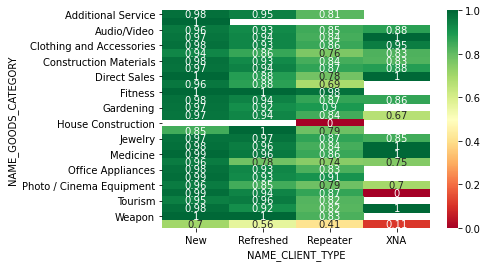

In [161]:
sns.heatmap(result4, annot=True, cmap="RdYlGn")

#### INFERENCE: FOR ALL TYPES OF GOODS CATEGORIES, THE APPROVAL RATE IS HIGH FOR NEW CLIENT AND PROGRESSIVELY DECREASES WITH REFRESHED AND REPEATER

#### INFERENCE: FOR HOUSE CONSTRUCTION FOR REPEATER TYPE OF LOANS THE APPROVAL RATE IS LOWEST OR "0". FOR FITNESS AND WEAPON CATEGORIES THE APPROVAL RATE ARE VERY HIGH ( 2 OUT OF 3 CATEGORIES HAVE 100%)

## MULTIVARIATE ANALYSIS 
### NUMBERIC AND CATEGORICAL WITH TARGET VARIABLE i.e. APPROVAL RATE
#### ANALYSIS OF APPROVAL RATE WITH AMOUNT OF CREDIT APPROVED

In [164]:
previousDF1.groupby ("NAME_CONTRACT_STATUS_flag")["AMT_CREDIT"].mean()

NAME_CONTRACT_STATUS_flag
0    185556.633410
1    202564.182131
Name: AMT_CREDIT, dtype: float64

#### INFERENCE: THE MEAN VALUE OF BOTH APPROVED AND NOT APPROVED CATEGORIES ARE VERY CLOSE. LOOKING AT THE MEDIAN ALSO NEXT

In [179]:
previousDF1.groupby ("NAME_CONTRACT_STATUS_flag")["AMT_CREDIT"].median()

NAME_CONTRACT_STATUS_flag
0         0.0
1    102208.5
Name: AMT_CREDIT, dtype: float64

#### INFERENCE: THE MEDIAN VALUE SHOWS THAT FOR FOR LOANS WHICH ARE NOT APPROVED, THE MEDIAN IS "0"

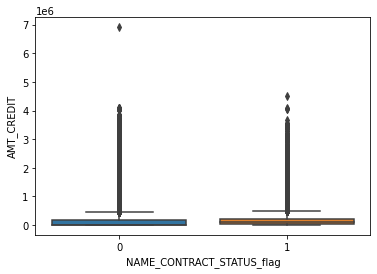

In [170]:
sns.boxplot(data=previousDF1, x="NAME_CONTRACT_STATUS_flag", y="AMT_CREDIT")
plt.show()

#### INFERENCE: DUE TO HIGH VALUE ITS DIFFICULT TO INTERPRET FROM THE BOX PLOT. HENCE WE WILL LOOK AT QUANTILES (75%) ALSO

#### DIRECTION: DEFINING FUNCTION FOR 75TH QUANTILE

In [171]:
def p75(x):
    return np.quantile(x,0.75)

In [176]:
previousDF1.groupby ("NAME_CONTRACT_STATUS_flag")["AMT_CREDIT"].aggregate (["mean", "median",p75])

,mean,median,p75
NAME_CONTRACT_STATUS_flag,,,
0,185556.633410,0.0,180000.0
1,202564.182131,102208.5,225000.0


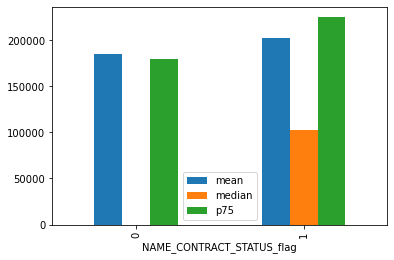

In [178]:
previousDF1.groupby ("NAME_CONTRACT_STATUS_flag")["AMT_CREDIT"].aggregate (["mean","median",p75]).plot.bar()
plt.show()

#### INFERENCE: FOR LOAN THAT WERE NOT APPROVED"0"(REFUSED, CANCELED, UNUSED OFFERS) - ITS SEEMS HIGH AMT_CREDIT GOT REFUSED WHEREAS MEDIUM (MEDIAN) TO LOW AMOUNT (MAY INCLUDE 0 ALSO) ARE EITHER CANCELLED OR UNUSED OFFERS 

#### INFERENCE: FOR LOAN THAT WERE APPROVED"1" - THE AMT_CREDIT ARE WELL SPREAD OUT WITH VALUES HIGH, MEDIUM ARE LOW ARE GETTING APPROVED